In [1]:
__author__ = 'Knut Olsen <kolsen@noao.edu' # single string; emails in <>
__version__ = '20190816' # yyyymmdd; version datestamp of this notebook
__datasets__ = ['delve']  # datasets used in this notebook; for available datasets, see cell "Available datasets in Data Lab" further below
__keywords__ = [''], # keywords relevant to this notebook, e.g. ['science case','dwarf galaxies'] Use only keywords from the master list: https://github.com/noaodatalab/notebooks-latest/blob/master/internal/keywords.txt

# Accessing DELVE data for August 2019 Collaboration Meeting
*Knut Olsen*

### Table of contents
* [Summary](#summary)
* [Disclaimer & Attribution](#attribution)
* [Imports & setup](#import)
* [Accessing the files](#files)
* [Accessing the database](#database)
* [Resources and references](#resources)

<a class="anchor" id="summary"></a>

# Summary
Adam Scott (ascott@noao.edu) and Mike Fitzpatrick (mfitzpatrick@noao.edu) have kindly loaded DELVE-Wide catalog data into a database available through Data Lab, as well as made the catalog files themselves accessible.  Here's a brief intro on accessing them.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution
If you use this notebook for your published science, please acknowledge the following:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, http://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: http://datalab.noao.edu/disclaimers.php

<a class="anchor" id="import"></a>
# Imports and setup

In [2]:
# std lib
from getpass import getpass
import os

# 3rd party # remove imports that are not needed
import numpy as np
import pylab as plt
import matplotlib
import healpy as hp
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc
# Data Lab helpers as needed, e.g.: (uncomment as needed)
# from dl.helpers import cluster  # import one particular helper module
# from dl.helpers.plot import plotSkymapScatter  # import one function from a helper module
# from dl.helpers import all  # convenience import of all helper modules
#
# or old-style:
#from dl.helpers import convert

<a class="anchor" id="files"></a>
# Accessing the files
If you provided us with your Data Lab user name, then a link to a directory with the catalog files will be in your home directory:

In [3]:
files = os.listdir(os.path.expandvars('$HOME/DELVE'))
files[:10]

['cat_hpx_05996.fits',
 'cat_hpx_05998.fits',
 'cat_hpx_05999.fits',
 'cat_hpx_06008.fits',
 'cat_hpx_06010.fits',
 'cat_hpx_06011.fits',
 'cat_hpx_06014.fits',
 'cat_hpx_06016.fits',
 'cat_hpx_06018.fits',
 'cat_hpx_06024.fits']

<a class="anchor" id="database"></a>
# Accessing the database

First check that you're logged in.  If not, use the commented code to log in to the server.  Your token is stored on the server, so you will remain logged in unless you explicitly log out.

In [4]:
ac.whoAmI()
# token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))

'knutago'

### Set the profile
The DELVE catalog data isn't visible through the public server, so you'll need to set a specific profile to see it:

In [5]:
qc.set_profile('gp04')

### List the columns
You can use the queryClient.schema() method to list the column names of the DELVE object table.  The column descriptions are empty for now.

In [6]:
print(qc.schema('delve.object'))


Schema: delve
 Table: object

     Column Name   Description
     -----------   -----------
       exptime_i   
       exptime_z   
       a_image_g   
       a_image_r   
       a_image_i   
 quick_object_id   
              ra   
             dec   
         hpx2048   
       mag_psf_g   
       mag_psf_r   
       mag_psf_i   
       mag_psf_z   
    magerr_psf_g   
    magerr_psf_r   
    magerr_psf_i   
    magerr_psf_z   
      mag_auto_g   
      mag_auto_r   
      mag_auto_i   
      mag_auto_z   
   magerr_auto_g   
   magerr_auto_r   
   magerr_auto_i   
   magerr_auto_z   
  spread_model_g   
  spread_model_r   
  spread_model_i   
  spread_model_z   
spreaderr_model_   
spreaderr_model_   
spreaderr_model_   
spreaderr_model_   
    class_star_g   
    class_star_r   
    class_star_i   
    class_star_z   
  wavg_mag_psf_g   
  wavg_mag_psf_r   
  wavg_mag_psf_i   
  wavg_mag_psf_z   
wavg_magerr_psf_   
wavg_magerr_psf_   
wavg_magerr_psf_   
wavg_magerr_psf_   
wavg_ma

### A basic query
We'll make a basic query, and return the output as a Pandas dataframe.  You can write your query as SQL (Postgres) or ADQL.

In [7]:
sql = '''SELECT * FROM delve.object LIMIT 10'''
adql = '''SELECT TOP 10 * FROM delve.object'''

df = qc.query(sql=sql,fmt='pandas')
dfa = qc.query(adql=adql,fmt='pandas')

In [8]:
df

,quick_object_id,ra,dec,hpx2048,mag_psf_g,mag_psf_r,mag_psf_i,mag_psf_z,magerr_psf_g,magerr_psf_r,...,nepochs_i,nepochs_z,flags_g,flags_r,flags_i,flags_z,wavg_flags_g,wavg_flags_r,wavg_flags_i,wavg_flags_z
0,10819800104836,197.594584,-19.638142,25520346,18.3573,17.8256,17.6797,17.5871,0.002736,0.002020,...,1,2,0,0,0,0,0,0,0,0
1,10819800057357,197.590015,-19.635502,25520346,99.0000,22.3877,21.5390,21.1904,99.000000,0.052453,...,1,2,99,0,0,0,99,0,0,0
2,10819800097437,197.592828,-19.634769,25520346,99.0000,23.1854,22.8077,99.0000,99.000000,0.107082,...,1,0,99,0,0,99,99,0,0,99
3,10819800104834,197.593395,-19.634519,25520346,99.0000,23.3655,22.9405,99.0000,99.000000,0.125455,...,1,0,99,0,2,99,99,0,2,99
4,10819800019633,197.596510,-19.643476,25520346,21.5559,19.8159,18.1898,17.4827,0.021604,0.006859,...,1,3,0,0,0,0,0,0,0,0
5,10819800104865,197.605681,-19.640278,25520346,18.4859,18.0409,17.9416,17.8894,0.003442,0.002287,...,1,2,0,0,0,0,0,0,0,0
6,10819800003776,197.597968,-19.638483,25520346,23.7755,23.3784,23.1676,99.0000,0.142259,0.127310,...,1,0,0,0,0,99,0,0,0,99
7,10819800053982,197.588173,-19.633124,25520346,99.0000,23.5047,99.0000,99.0000,99.000000,0.153650,...,0,0,99,0,99,99,99,0,99,99
8,10819800053994,197.590045,-19.631494,25520346,99.0000,23.3825,99.0000,99.0000,99.000000,0.127539,...,0,0,99,0,99,99,99,0,99,99
9,10819800053981,197.592721,-19.631149,25520346,99.0000,23.6021,22.6687,22.1800,99.000000,0.157035,...,1,2,99,0,0,0,99,0,0,0


In [9]:
dfa

,exptime_i,exptime_z,a_image_g,a_image_r,a_image_i,quick_object_id,ra,dec,hpx2048,mag_psf_g,...,nepochs_i,nepochs_z,flags_g,flags_r,flags_i,flags_z,wavg_flags_g,wavg_flags_r,wavg_flags_i,wavg_flags_z
0,90,70,2.600344,2.688406,2.049097,10819800104836,197.594584,-19.638142,25520346,18.357338,...,1,2,0,0,0,0,0,0,0,0
1,90,70,-1.000000,1.711413,1.850703,10819800057357,197.590015,-19.635502,25520346,99.000000,...,1,2,99,0,0,0,99,0,0,0
2,90,-1,-1.000000,1.471947,0.969565,10819800097437,197.592828,-19.634769,25520346,99.000000,...,1,0,99,0,0,99,99,0,0,99
3,90,-1,-1.000000,1.844164,1.315951,10819800104834,197.593395,-19.634519,25520346,99.000000,...,1,0,99,0,2,99,99,0,2,99
4,90,70,2.113518,2.332949,1.975237,10819800019633,197.596510,-19.643476,25520346,21.555880,...,1,3,0,0,0,0,0,0,0,0
5,90,52,2.893337,2.661413,2.049725,10819800104865,197.605681,-19.640278,25520346,18.485876,...,1,2,0,0,0,0,0,0,0,0
6,90,-1,1.077172,0.806146,1.155030,10819800003776,197.597968,-19.638483,25520346,23.775455,...,1,0,0,0,0,99,0,0,0,99
7,-1,-1,-1.000000,0.928814,-1.000000,10819800053982,197.588173,-19.633124,25520346,99.000000,...,0,0,99,0,99,99,99,0,99,99
8,-1,-1,-1.000000,1.078122,-1.000000,10819800053994,197.590045,-19.631494,25520346,99.000000,...,0,0,99,0,99,99,99,0,99,99
9,90,70,-1.000000,1.107443,2.070908,10819800053981,197.592721,-19.631149,25520346,99.000000,...,1,2,99,0,0,0,99,0,0,0


### Crossmatch tables
Adam Scott (ascott@noao.edu) helped us make crossmatch tables of the DELVE object table with the Gaia DR2 source table and the AllWISE object table, using a 1.5 arcsec crossmatch radius.

In [10]:
sql = '''SELECT * FROM delve.x_gaia_dr2 LIMIT 10'''
df = qc.query(sql=sql,fmt='pandas')
df

,quick_object_id,ra,dec,gaia_source_id,gaia_ra,gaia_dec,q3c_dist
0,10949400009923,242.384293,-32.362802,6035798909250019456,242.384288,-32.362804,0.000005
1,10949400009923,242.384293,-32.362802,6035798909241952256,242.384744,-32.362707,0.000393
2,10949400009934,242.384575,-32.361788,6035798909250019712,242.384568,-32.361789,0.000006
3,10949400009966,242.386686,-32.362121,6035798909242286080,242.386682,-32.362136,0.000015
4,10949400009955,242.385636,-32.360921,6035798909242287616,242.385616,-32.360912,0.000019
5,10949400009889,242.378171,-32.355248,6035798977962812288,242.378159,-32.355260,0.000015
6,10949400009906,242.379547,-32.353985,6035798977969583872,242.379533,-32.353987,0.000012
7,10949400009856,242.375820,-32.350951,6035798973654527744,242.375819,-32.350953,0.000003
8,10949400009842,242.374347,-32.349682,6035798977961458048,242.374341,-32.349689,0.000009
9,10949400009871,242.381892,-32.358095,6035798909250022272,242.381883,-32.358103,0.000011


In [11]:
sql = '''SELECT * FROM delve.x_allwise LIMIT 10'''
dfw = qc.query(sql=sql,fmt='pandas')
dfw

,quick_object_id,ra,dec,allwise_source_id,allwise_ra,allwise_dec,q3c_dist
0,10856800108626,157.006163,-22.575573,1563m228_ac51-027869,157.006184,-22.575334,0.000240
1,10856800079982,157.001903,-22.566304,1563m228_ac51-028361,157.001625,-22.566338,0.000259
2,10856800108603,156.988047,-22.556833,1563m228_ac51-051492,156.988108,-22.556722,0.000124
3,10856800012364,156.984141,-22.553626,1563m228_ac51-052642,156.984315,-22.553506,0.000200
4,10856800108628,157.009207,-22.572229,1563m228_ac51-028140,157.009150,-22.572353,0.000134
5,10856800173847,157.013456,-22.568596,1563m228_ac51-027749,157.013460,-22.568599,0.000005
6,10856800080015,157.023700,-22.572130,1563m228_ac51-027937,157.023753,-22.572133,0.000049
7,10856800056707,157.009798,-22.565688,1563m228_ac51-027920,157.009804,-22.565695,0.000008
8,10856800080001,157.014128,-22.560287,1563m228_ac51-029529,157.013914,-22.560165,0.000233
9,10856800160188,157.030333,-22.564884,1563m228_ac51-029303,157.030518,-22.564810,0.000186


### Example usage of the crossmatch tables
In the query below, we'll select the first 10 rows of the DELVE object table and return the rows that have a match in AllWISE, using the DELVE/AllWISE crossmatch table, and return all columns from DELVE as well as all columns from the crossmatch table.  Note that if we had done something like:<br>
>SELECT * FROM delve.object AS d
INNER JOIN delve.x_allwise AS x
ON d.quick_object_id = x.quick_object_id
LIMIT 10<br>

you might think it will accomplish the same thing, but this query will first need to construct the JOIN of all of delve.object with the full crossmatch table, then apply the LIMIT at the end.  It will be slow.


In [12]:
sql = '''SELECT d.*,x.* FROM 
    (SELECT * FROM delve.object LIMIT 10) AS d
    INNER JOIN delve.x_allwise AS x
    ON d.quick_object_id = x.quick_object_id
'''
dfx = qc.query(sql=sql,fmt='pandas')

In [13]:
dfx

,quick_object_id,ra,dec,hpx2048,mag_psf_g,mag_psf_r,mag_psf_i,mag_psf_z,magerr_psf_g,magerr_psf_r,...,wavg_flags_r,wavg_flags_i,wavg_flags_z,quick_object_id.1,ra.1,dec.1,allwise_source_id,allwise_ra,allwise_dec,q3c_dist
0,10819800104836,197.594584,-19.638142,25520346,18.3573,17.8256,17.6797,17.5871,0.002736,0.002020,...,0,0,0,10819800104836,197.594584,-19.638142,1968m197_ac51-026280,197.594503,-19.638103,0.000086
1,10819800057357,197.590015,-19.635502,25520346,99.0000,22.3877,21.5390,21.1904,99.000000,0.052453,...,0,0,0,10819800057357,197.590015,-19.635502,1968m197_ac51-026467,197.589994,-19.635637,0.000136
2,10819800104834,197.593395,-19.634519,25520346,99.0000,23.3655,22.9405,99.0000,99.000000,0.125455,...,0,2,99,10819800104834,197.593395,-19.634519,1968m197_ac51-026807,197.593196,-19.634354,0.000249
3,10819800019633,197.596510,-19.643476,25520346,21.5559,19.8159,18.1898,17.4827,0.021604,0.006859,...,0,0,0,10819800019633,197.596510,-19.643476,1968m197_ac51-025980,197.596544,-19.643429,0.000057
4,10819800104865,197.605681,-19.640278,25520346,18.4859,18.0409,17.9416,17.8894,0.003442,0.002287,...,0,0,0,10819800104865,197.605681,-19.640278,1984m197_ac51-036670,197.605607,-19.640144,0.000151
5,10819800053981,197.592721,-19.631149,25520346,99.0000,23.6021,22.6687,22.1800,99.000000,0.157035,...,0,0,0,10819800053981,197.592721,-19.631149,1968m197_ac51-026479,197.592709,-19.631177,0.000029


In the next query, we want to get objects in DELVE that have matches in the Gaia crossmatch table, and return both DELVE columns and Gaia columns.  The query in parantheses does a JOIN of the Gaia table with the crossmatch table on gaia_source_id, and then JOINs that table against DELVE on the DELVE's quick_object_id.  We use a range limit on ring256 Healpix id in order to limit the size of the query.

In [14]:
sql = '''SELECT d.ra,d.dec,d.mag_auto_g,d.mag_auto_i,d.mag_auto_r,d.spread_model_g, d.spread_model_i,
    d.spread_model_r,d.hpx2048, d.spreaderr_model_g, d.expnum_g, d.expnum_i,gt.*
    FROM delve.object AS d
    INNER JOIN (SELECT x.gaia_source_id as gaia_id, x.quick_object_id as delve_id,
        g.pmra as gaia_pmra, g.pmra_error as gaia_pmra_err, g.pmdec as gaia_pmdec,
        g.pmdec_error as gaia_pmdec_err
        FROM gaia_dr2.gaia_source as g
        INNER JOIN delve.x_gaia_dr2 as x
        ON g.source_id=x.gaia_source_id
    WHERE (g.ring256 > {0} AND g.ring256 < {1})) as gt
    ON d.quick_object_id=gt.delve_id
    WHERE (d.ring256 >= {0} AND d.ring256 <= {1} AND d.mag_auto_g<{2} AND d.mag_auto_i<{3} AND d.spread_model_g < {4})
'''.format(385874,386784,24.,24.,0.005)

In [15]:
%%time
dfx2 = qc.query(sql=sql,fmt='pandas')

CPU times: user 23 ms, sys: 0 ns, total: 23 ms
Wall time: 1.75 s


In [16]:
dfx2

,ra,dec,mag_auto_g,mag_auto_i,mag_auto_r,spread_model_g,spread_model_i,spread_model_r,hpx2048,spreaderr_model_g,expnum_g,expnum_i,gaia_id,delve_id,gaia_pmra,gaia_pmra_err,gaia_pmdec,gaia_pmdec_err
0,147.646641,0.906476,21.9968,19.7044,20.6498,0.000613,0.000097,-0.000268,27897792,0.001221,411353,421498,3834243405383308032,10613200002239,NaN,NaN,NaN,NaN
1,228.866590,0.903302,18.0200,17.4775,17.5850,-0.000211,0.000268,-0.000427,32158976,0.000055,449373,225066,4419896006171251328,10603300035690,-11.365453,0.253947,-4.554225,0.218029
2,147.666418,0.911529,21.5681,18.6076,20.1005,0.000356,-0.000064,0.000443,27897792,0.001090,410969,421498,3834243371023639424,10613200002243,-10.047956,0.905384,2.174385,0.860880
3,220.780200,0.897825,22.5819,19.7547,20.8629,-0.004863,-0.000036,0.000147,26570688,0.003158,338179,206472,3651847551751837824,10615800001924,-7.584889,2.154220,-0.690008,2.061962
4,146.962146,0.910307,22.5862,19.8330,21.0904,-0.000958,-0.000531,0.000903,27985088,0.002134,411303,421498,3846241241902960128,10600400002622,NaN,NaN,NaN,NaN


If we want all DELVE objects in our Healpix range that satisfy the magnitude and spread_model constraints, we could use a LEFT JOIN in the statement outside the parentheses:

In [17]:
sql = '''SELECT d.ra,d.dec,d.mag_auto_g,d.mag_auto_i,d.mag_auto_r,d.spread_model_g, d.spread_model_i,
    d.spread_model_r,d.hpx2048, d.spreaderr_model_g, d.expnum_g, d.expnum_i,gt.*
    FROM delve.object AS d
    LEFT JOIN (SELECT x.gaia_source_id as gaia_id, x.quick_object_id as delve_id,
        g.pmra as gaia_pmra, g.pmra_error as gaia_pmra_err, g.pmdec as gaia_pmdec,
        g.pmdec_error as gaia_pmdec_err
        FROM gaia_dr2.gaia_source as g
        INNER JOIN delve.x_gaia_dr2 as x
        ON g.source_id=x.gaia_source_id
    WHERE (g.ring256 > {0} AND g.ring256 < {1})) as gt
    ON d.quick_object_id=gt.delve_id
    WHERE (d.ring256 >= {0} AND d.ring256 <= {1} AND d.mag_auto_g<{2} AND d.mag_auto_i<{3} AND d.spread_model_g < {4})
'''.format(385874,386784,24.,24.,0.005)

In [18]:
%%time
dfx3 = qc.query(sql=sql,fmt='pandas')

CPU times: user 23 ms, sys: 0 ns, total: 23 ms
Wall time: 5.46 s


In [19]:
dfx3

,ra,dec,mag_auto_g,mag_auto_i,mag_auto_r,spread_model_g,spread_model_i,spread_model_r,hpx2048,spreaderr_model_g,expnum_g,expnum_i,gaia_id,delve_id,gaia_pmra,gaia_pmra_err,gaia_pmdec,gaia_pmdec_err
0,228.866590,0.903302,18.0200,17.4775,17.5850,-0.000211,0.000268,-0.000427,32158976,0.000055,449373,225066,4.419896e+18,1.060330e+13,-11.365453,0.253947,-4.554225,0.218029
1,146.962146,0.910307,22.5862,19.8330,21.0904,-0.000958,-0.000531,0.000903,27985088,0.002134,411303,421498,3.846241e+18,1.060040e+13,NaN,NaN,NaN,NaN
2,147.646641,0.906476,21.9968,19.7044,20.6498,0.000613,0.000097,-0.000268,27897792,0.001221,411353,421498,3.834243e+18,1.061320e+13,NaN,NaN,NaN,NaN
3,147.666418,0.911529,21.5681,18.6076,20.1005,0.000356,-0.000064,0.000443,27897792,0.001090,410969,421498,3.834243e+18,1.061320e+13,-10.047956,0.905384,2.174385,0.860880
4,220.780200,0.897825,22.5819,19.7547,20.8629,-0.004863,-0.000036,0.000147,26570688,0.003158,338179,206472,3.651848e+18,1.061580e+13,-7.584889,2.154220,-0.690008,2.061962
5,228.875273,0.903028,22.3111,21.2572,21.5445,-0.002084,-0.001428,-0.001209,32158976,0.000914,449373,225066,NaN,NaN,NaN,NaN,NaN,NaN
6,147.641488,0.910370,23.4050,21.2425,22.0888,-0.002813,0.007418,0.000174,27897792,0.005281,411806,421498,NaN,NaN,NaN,NaN,NaN,NaN
7,146.957032,0.906961,23.1960,21.9158,99.0000,-0.002194,0.001805,-1.000000,27985088,0.003335,411353,421498,NaN,NaN,NaN,NaN,NaN,NaN
8,146.969442,0.910876,23.4537,20.6455,22.0193,-0.001807,0.000487,-0.002358,27985088,0.004944,413678,421498,NaN,NaN,NaN,NaN,NaN,NaN


### Another basic query
Here we'll look for objects associated with a specific exposure number.  Note that expnum_g isn't indexed (should it be?) so the query is a bit slow.

In [20]:
%%time
# note, expnum_g isn't indexed
sql = '''SELECT * FROM delve.object WHERE expnum_g=813445'''
df1 = qc.query(sql=sql,fmt='pandas')

CPU times: user 1.15 s, sys: 211 ms, total: 1.36 s
Wall time: 34.3 s


### A cone search
Data Lab uses Q3C indices to speed up cone search queries.  Here's an example:

In [21]:
ra,dec = df1['ra'][0],df1['dec'][0]

In [22]:
sql = '''SELECT * FROM delve.object where Q3C_RADIAL_QUERY(ra,dec,{0},{1},1.2)'''.format(ra,dec)
print(sql)

SELECT * FROM delve.object where Q3C_RADIAL_QUERY(ra,dec,134.868704428938,-31.8118172702222,1.2)


In [23]:
%%time
dfr = qc.query(sql=sql,fmt='pandas')

CPU times: user 4.13 s, sys: 696 ms, total: 4.83 s
Wall time: 21.9 s


Text(0,0.5,'Dec')

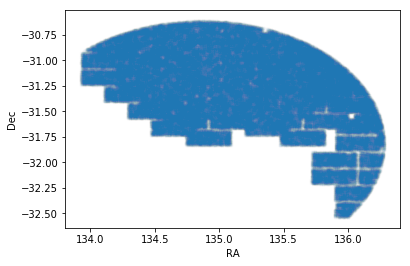

In [24]:
plt.scatter(dfr['ra'],dfr['dec'],marker='.',alpha=0.01)
plt.xlabel('RA')
plt.ylabel('Dec')

Text(0,0.5,'g')

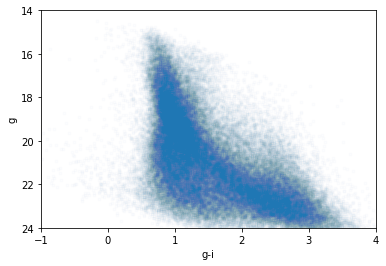

In [25]:
plt.scatter(dfr['mag_auto_g']-dfr['mag_auto_i'],dfr['mag_auto_g'],marker='.',alpha=0.01)
plt.xlim(-1,4)
plt.ylim(24,14)
plt.xlabel('g-i')
plt.ylabel('g')

### Make a density map
Here we'll issue a query that aggregates objects by their Healpix ID on an NSIDE=256 RING scheme, and display the object density map.

In [26]:
%%time
sql = '''SELECT AVG(ra) AS ra0,AVG(dec) AS dec0,COUNT(ra) as nb,ring256 FROM delve.object GROUP BY ring256'''
df2 = qc.query(sql=sql,fmt='pandas')

CPU times: user 147 ms, sys: 9 ms, total: 156 ms
Wall time: 49.5 s


In [27]:
map = np.zeros(hp.nside2npix(256))
map[df2['ring256']] = df2['nb']

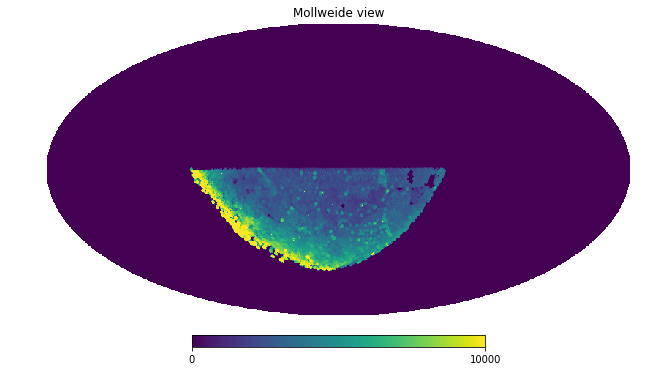

In [28]:
hp.mollview(map,rot=180,min=0,max=10000)

In [29]:
df2['ring256'].min(),df2['ring256'].max()

(385874, 710400)

### More info
Have a look at the HowTos and Science Examples folders in the notebooks directory for other things you might want to learn how to do.

<a class="anchor" id="resources"></a>
# Resources and references
